# Data Science Assignment: Submitted by Deepak Mishra

In [39]:
# -*- coding: utf-8 -*-
"""
Created on Sun Sep 23 18:30:22 2018

@author: Deepak Mishra
"""
import pandas as pd

#READ THE DATA SHEET FROM EXCEL FILE
dt1=pd.read_excel("Data Science Assignment September 2018.xlsx",'Data')

In [40]:
#RENAME FIELD Lead ID to Lead_ID
dt1.rename(columns={'Lead ID':'Lead_ID'},inplace=True)

#CREATE A FIELD FROM post_date to YYYY-MM
dt1['YearMon'] = dt1.post_date.dt.to_period('M')

In [2]:
#INSPECTING DATA
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29029 entries, 0 to 29028
Data columns (total 12 columns):
Lead ID             29029 non-null int64
bankid              29029 non-null int64
bank_account_id     29029 non-null int64
account_number      29029 non-null object
Industry            29029 non-null object
post_date           29029 non-null datetime64[ns]
description         29029 non-null object
transaction_type    29029 non-null object
amount              29029 non-null float64
running_balance     29029 non-null float64
trans_order         29029 non-null int64
YearMon             29029 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 2.7+ MB


In [3]:
# CHECK FIRST FEW RECORDS
dt1.head()

,Lead ID,bankid,bank_account_id,account_number,Industry,post_date,description,transaction_type,amount,running_balance,trans_order,YearMon
0,321146,10479,13971,1,Retail Trade,2017-03-02,2017-03-01 00:00:00,credit,3.00,1032.65,2,201703
1,330698,8545,14374,1693,Health Care and Social Assistance,2017-01-13,#1008 Paid Check,debit,1062.78,6889.75,6,201701
2,330698,8545,14374,1693,Health Care and Social Assistance,2017-01-13,#1009 Paid Check,debit,1063.73,11125.54,2,201701
3,330698,8545,14374,1693,Health Care and Social Assistance,2017-01-17,#1011 Paid Check,debit,600.99,45497.83,28,201701
4,330698,8545,14374,1693,Health Care and Social Assistance,2017-01-13,#1012 Paid Check,debit,1284.15,21832.54,11,201701


In [4]:
#SEE THE DESCRIPTIVE STATS
dt1.describe()

,Lead ID,bankid,bank_account_id,amount,running_balance,trans_order,YearMon
count,29029.000000,29029.000000,29029.000000,29029.000000,29029.000000,29029.000000,29029.000000
mean,320714.718282,8823.888491,14052.030556,1927.453475,10247.851975,5.397223,201621.161184
std,5051.317064,683.963276,703.164708,7450.638452,20055.683105,5.445505,33.362569
min,308148.000000,6192.000000,12460.000000,0.000000,-84727.980000,1.000000,201511.000000
25%,316728.000000,8534.000000,13234.000000,29.250000,798.850000,2.000000,201606.000000
50%,321380.000000,8535.000000,14049.000000,160.500000,3820.940000,4.000000,201609.000000
75%,323253.000000,8545.000000,14636.000000,788.460000,11898.880000,7.000000,201611.000000
max,330698.000000,10656.000000,15148.000000,419000.000000,437942.290000,48.000000,201703.000000


## Exercises

### Solutions to exercises in order

####  Exercise #1. Count the number of merchants, bank accounts and tabulate:

In [ ]:
Num_Merchants=dt1.Lead_ID.nunique()
print("Number of Unique Merchants: ",Num_Merchants)
#Number of Unique Merchants:   21

##### Check If bank account_id and account_number are unique

In [8]:
dt1.groupby('Lead_ID')['bank_account_id','account_number'].nunique().sum()

bank_account_id    53
account_number     52
dtype: int64

<b>There is one account number associated with 2 bank account id, this seems suspicious</b>

#### Exercise 1. (i) the number of bank accounts for each merchant

In [9]:
dt1.groupby('Lead_ID')['bank_account_id','account_number'].nunique()

,bank_account_id,account_number
Lead_ID,,
308148,1,1
310443,2,2
312745,5,5
313082,1,1
314036,1,1
314559,2,2
316728,6,6
318465,7,7
321146,2,1


<b>There customer 321146 one account number associated with 2 bank account id, this seems suspicious</b>

#### Exercise 1. (ii) the number of months of each bank account for which data is available.

In [11]:
#  convert the result to dataframe for better looks and analysis
res_ii=dt1.groupby(['Lead_ID','bank_account_id']).YearMon.nunique().reset_index()
print(res_ii.head())

#verify above result
dt1.loc[ dt1.bank_account_id==14045]

   Lead_ID  bank_account_id  YearMon
0   308148            12460       10
1   310443            12654        7
2   310443            12655       12
3   312745            12835        5
4   312745            12836        5


,Lead_ID,bankid,bank_account_id,account_number,Industry,post_date,description,transaction_type,amount,running_balance,trans_order,YearMon
15906,326062,8535,14045,xxxx5576,Accommodation and Food Services,2017-01-25,Online Transfer to CHK ...0403 transaction#: x...,debit,0.54,50.00,1,2017-01
16120,326062,8535,14045,xxxx5576,Accommodation and Food Services,2016-12-05,Online Transfer to CHK ...9573 transaction#: x...,debit,50.00,50.54,1,2016-12


##### Exercise 1. #(iii) the total number of credits (deposits), debits (withdrawals) and their averages per month for each bank account and each merchant


In [12]:
res_iii=dt1.groupby(['Lead_ID','bank_account_id','transaction_type']
            ).agg({'amount': ['size','mean']}).reset_index()
print(res_iii.head())
#verify results
print(res_iii.loc[res_iii.bank_account_id==12836])
dt1.loc[ dt1.bank_account_id==12836]

  Lead_ID bank_account_id transaction_type amount              
                                             size          mean
0  308148           12460           credit    172    387.273430
1  308148           12460            debit    320    193.123844
2  310443           12654           credit     27  11434.547407
3  310443           12654            debit    223   1474.867175
4  310443           12655           credit      8   2050.055000
  Lead_ID bank_account_id transaction_type amount         
                                             size     mean
8  312745           12836           credit      3  6351.93
9  312745           12836            debit      5  3807.00


,Lead_ID,bankid,bank_account_id,account_number,Industry,post_date,description,transaction_type,amount,running_balance,trans_order,YearMon
10263,312745,8544,12836,7186,"Professional, Scientific, and Technical Services",2016-06-03,DEPOSIT,credit,2555.79,2555.79,1,2016-06
10677,312745,8544,12836,7186,"Professional, Scientific, and Technical Services",2016-08-23,DEPOSIT MADE IN A BRANCH/STORE #xxxxx3963,credit,1500.00,2020.79,1,2016-08
10764,312745,8544,12836,7186,"Professional, Scientific, and Technical Services",2016-06-15,DEPOSIT MADE IN A BRANCH/STORE #xxxxx6367,credit,15000.00,15555.79,1,2016-06
14358,312745,8544,12836,7186,"Professional, Scientific, and Technical Services",2016-06-17,NSF RETURN ITEM FEE FOR A TRANSACTION RECEIVED...,debit,35.00,15520.79,1,2016-06
16443,312745,8544,12836,7186,"Professional, Scientific, and Technical Services",2016-11-21,ONLINE TRANSFER TO RANGOLI LLC BUSINESS CHECKI...,debit,500.00,20.79,1,2016-11
16447,312745,8544,12836,7186,"Professional, Scientific, and Technical Services",2016-10-06,ONLINE TRANSFER TO RANGOLI LLC BUSINESS CHECKI...,debit,1500.00,520.79,1,2016-10
24265,312745,8544,12836,7186,"Professional, Scientific, and Technical Services",2016-06-09,WITHDRAWAL MADE IN A BRANCH/STORE,debit,2000.00,555.79,1,2016-06
24266,312745,8544,12836,7186,"Professional, Scientific, and Technical Services",2016-07-06,WITHDRAWAL MADE IN A BRANCH/STORE,debit,15000.00,520.79,1,2016-07


##### Exercise 1. (iv) the total dollar value of credits, debits and their averages per month for each bank account and each merchant

In [13]:
res_iv=dt1.groupby(['Lead_ID','bank_account_id','transaction_type','YearMon']
            ).agg({'amount': ['size','sum','mean']}).reset_index()
res_iv.head()

Lead_ID bank_account_id transaction_type YearMon amount                    
                                                     size      sum       mean
0  308148           12460           credit 2016-03      5  6098.62  1219.7240
1  308148           12460           credit 2016-04      1  1500.00  1500.0000
2  308148           12460           credit 2016-05      4   774.95   193.7375
3  308148           12460           credit 2016-06      4  2369.38   592.3450
4  308148           12460           credit 2016-07     20  8105.04   405.2520

##### Exercise 1. (v) Aggregate the answers to (iii) and (iv) at the merchant level, industry level and bankid level

In [15]:
res_v=dt1.groupby(['Lead_ID','bankid','Industry']
            ).agg({'amount': ['size','sum','mean']}).reset_index()
res_v.head()

Lead_ID bankid                                          Industry amount  \
                                                                     size   
0  308148   8535                   Accommodation and Food Services    492   
1  310443   6192                                      Construction    281   
2  312745   8544  Professional, Scientific, and Technical Services    760   
3  313082   8535  Professional, Scientific, and Technical Services   1138   
4  314036   9966                                      Retail Trade   2261   

                            
          sum         mean  
0   128410.66   260.997276  
1   671795.26  2390.730463  
2  1432688.42  1885.116342  
3  1105902.61   971.794912  
4   878894.92   388.719558

##### Exercise 1. (vi) Develop a slide visualizing the relationship between LeadID, bankid, bank_account_id and account_number 

In [14]:
dt1.groupby(['Lead_ID','bankid','bank_account_id','account_number']).size()

Lead_ID  bankid  bank_account_id  account_number
308148   8535    12460            xxxx9928           492
310443   6192    12654            xxxx9363           250
                 12655            xxxx9355            31
312745   8544    12835            2549                18
                 12836            7186                 8
                 12837            3266                 1
                 12838            8423                82
                 12839            3582               651
313082   8535    13233            xxxx4241          1138
314036   9966    13226            xxxx7053          2261
314559   8534    13271            xxxx3965           415
                 13273            xxxx3981            12
316728   8534    13272            xxxx4095           123
         8544    13228            8151               479
                 13230            4615                87
                 13232            8118              1708
                 13234            8126 



### Exercise 2. Consider Lead ID: 318465, bank_account_id: 13419  
#### - plot the withdrawals, deposits and end-of-day daily balance 
#### -as a daily time series; do the same for Lead ID: 316728, bank_account_id : 13232.

In [17]:
#SELECT DESIRED ACCOUNT ID
dt1=dt1.loc[(dt1.Lead_ID==318465) &  (dt1.bank_account_id==13419)].reset_index()

#MULTIPLY THE DEBIT AMOUNTS BY -1
dt1.loc[dt1.transaction_type=='debit','amount']=-1*dt1.amount

#SORT THE DATA BY DATE AND TRANSACTION ORDER
dt1.sort_values(['Lead_ID','bankid','bank_account_id','post_date','trans_order'], inplace=True)

#SET THE OPENING BALANCE FOR EACH ACCOUNT
dt1['amount'].iloc[0]= dt1['running_balance'].values[0]

#COMPUTE EOD BALANCE
grpby=dt1.groupby(['Lead_ID','bankid','bank_account_id','post_date'])['amount'].sum().reset_index()
grpby['EOD_BAL']=grpby.amount.cumsum()
print(grpby)

     Lead_ID  bankid  bank_account_id  post_date   amount    EOD_BAL
0     318465    9262            13419 2016-04-12   607.52     607.52
1     318465    9262            13419 2016-04-13  1713.25    2320.77
2     318465    9262            13419 2016-04-14    97.34    2418.11
3     318465    9262            13419 2016-04-15  1387.37    3805.48
4     318465    9262            13419 2016-04-16   584.83    4390.31
5     318465    9262            13419 2016-04-17    43.50    4433.81
6     318465    9262            13419 2016-04-18   130.88    4564.69
7     318465    9262            13419 2016-04-19   185.53    4750.22
8     318465    9262            13419 2016-04-20  1548.91    6299.13
9     318465    9262            13419 2016-04-21  1677.77    7976.90
10    318465    9262            13419 2016-04-22   327.66    8304.56
11    318465    9262            13419 2016-04-23   555.76    8860.32
12    318465    9262            13419 2016-04-24    14.28    8874.60
13    318465    9262            13

C:\Users\u0137159\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


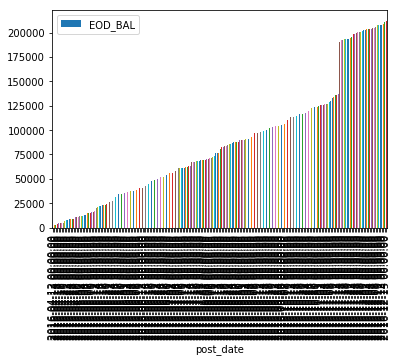

In [19]:
#PLOT THE EOD BALANCES
grpby.plot(x='post_date',y='EOD_BAL',kind='bar')

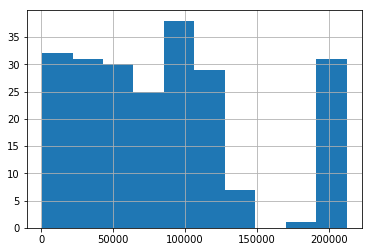

In [20]:
#CHECK THE DISTRIBUTION OF EOD BALANCE
grpby.EOD_BAL.hist()

In [21]:
#DESCRIPTIVE STATS OF EOD BALANCES
grpby.EOD_BAL.describe()

count       224.000000
mean      86309.473661
std       59286.733062
min         607.520000
25%       38510.722500
50%       78649.610000
75%      116936.897500
max      212314.590000
Name: EOD_BAL, dtype: float64

In [22]:
#DATA FOR WITHDRAWL AND DEPOSITS/ CREDIT AND DEBIT
#GET THE CREDIT AND DEBIT BY EOD
crdr=dt1.groupby(['Lead_ID','bankid','bank_account_id','post_date','transaction_type'])['amount'].sum().reset_index()
#GET THE CREDIT DEBIT AS SEPARATE COLUMNS FOR PLOTTING
pivt=(crdr.pivot_table(index=['Lead_ID','bankid','bank_account_id','post_date']
                      ,columns=  'transaction_type',values='amount' ).reset_index()
      )
pivt.fillna(value=0,inplace=True)

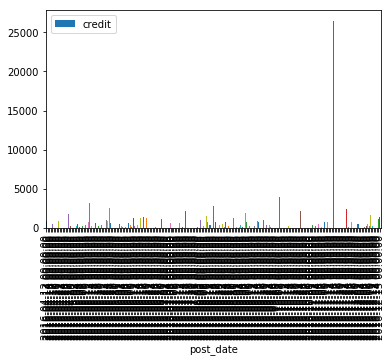

In [23]:
pivt.plot(x='post_date',y='credit',kind='bar')

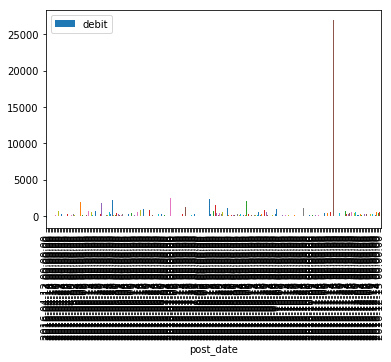

In [24]:
pivt.plot(x='post_date',y='debit',kind='bar')

### 3. For the merchants with the above Lead IDs, plot the withdrawals, deposits 
#### and end-of-day daily balance as a daily time series 
#### (aggregate over all their bank accounts)

In [33]:
#COMPUTE EOD BALANCE
#MULTIPLY THE DEBIT AMOUNTS BY -1
dt1.loc[dt1.transaction_type=='debit','amount']=-1*dt1.amount
# SELECT THE DATA FOR LEAD ID
dt11=dt1.loc[(dt1.Lead_ID==318465)].reset_index()
allacct = pd.DataFrame()
allpivt=pd.DataFrame()
#LOOP THOURGH ALL ACCOUNT ID OF A LEAD ID
for acct in dt11.bank_account_id.unique().tolist():
    #SELECT DESIRED ACCOUNT ID
    dt1=dt11.loc[(dt11.bank_account_id==acct)].reset_index()
    
    #SORT THE DATA BY DATE AND TRANSACTION ORDER
    dt1.sort_values(['Lead_ID','bankid','bank_account_id','post_date','trans_order'], inplace=True)
    
    #SET THE OPENING BALANCE FOR EACH ACCOUNT
    dt1['amount'].iloc[0]= dt1['running_balance'].values[0]
    
    #COMPUTE EOD BALANCE
    grpby=dt1.groupby(['Lead_ID','bankid','bank_account_id','post_date'])['amount'].sum().reset_index()
    grpby['EOD_BAL']=grpby.amount.cumsum()
    allacct = allacct.append(grpby)
    print(grpby.EOD_BAL.describe())
    #GET THE CREDIT AND DEBIT BY EOD
    crdr=dt1.groupby(['Lead_ID','bankid','bank_account_id','post_date','transaction_type'])['amount'].sum().reset_index()
    #GET THE CREDIT DEBIT AS SEPARATE COLUMNS FOR PLOTTING
    pivt=(crdr.pivot_table(index=['Lead_ID','bankid','bank_account_id','post_date']
                          ,columns=  'transaction_type',values='amount' ).reset_index()
          )
    pivt.fillna(value=0,inplace=True)
    allpivt=allpivt.append(pivt)
    print(pivt.describe())

#NOW CREATE EOD BALANCE AT MERCHANT LEVEL
#COMPUTE EOD BALANCE
mrhtEOD=allacct.groupby(['Lead_ID','post_date'])['amount'].sum().reset_index()
mrhtEOD['EOD_BAL']=mrhtEOD.amount.cumsum()

C:\Users\u0137159\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


count     224.000000
mean      746.001696
std       808.487639
min     -1316.100000
25%       242.440000
50%       499.220000
75%      1250.092500
max      3508.180000
Name: EOD_BAL, dtype: float64
transaction_type   Lead_ID  bankid  bank_account_id        credit  \
count                224.0   224.0            224.0    224.000000   
mean              318465.0  9262.0          13419.0    479.227813   
std                    0.0     0.0              0.0   1849.529488   
min               318465.0  9262.0          13419.0      0.000000   
25%               318465.0  9262.0          13419.0      0.000000   
50%               318465.0  9262.0          13419.0     51.040000   
75%               318465.0  9262.0          13419.0    500.000000   
max               318465.0  9262.0          13419.0  26523.590000   

transaction_type         debit  
count               224.000000  
mean               -470.352857  
std                1834.700882  
min              -26925.500000  
25%            

C:\Users\u0137159\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


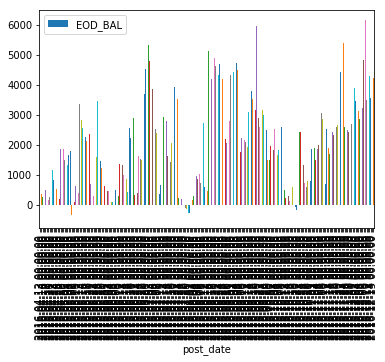

In [34]:
#PLOT THE EOD BALANCES
mrhtEOD.plot(x='post_date',y='EOD_BAL',kind='bar')

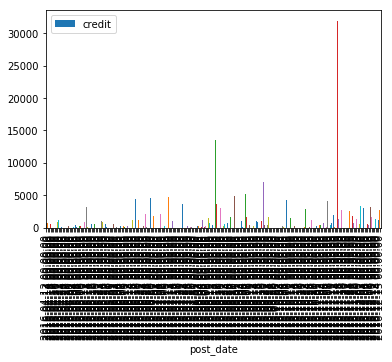

In [36]:
#CREDIT DEBIT AT MERCHANT LEVEL
crdrall=allpivt.groupby(['Lead_ID','post_date'])['credit','debit'].sum().reset_index()
crdrall.plot(x='post_date',y='credit',kind='bar')

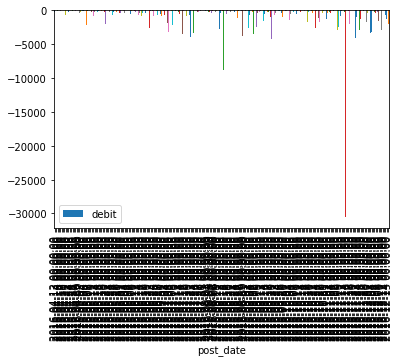

In [37]:
crdrall.plot(x='post_date',y='debit',kind='bar')

### EXERCISE #4. The cash flow of a business has many dimensions 
#### [for example, top 5 deposits/Total deposits,  
#### average # of days between two withdrawals, 
#### coefficient of variation of the daily balance] 
#### that are potentially relevant to a borrower’s ability to repay. 
#### Can you obtain the value of these variables for each merchant?
#### What other cash flow variables can you hypothesize that could be relevant  for predicting merchant default?

In [41]:
#TOP 5 DEPOSITS FOR EACH MERCHANT
deposits=dt1.loc[dt1.transaction_type=='credit']
topdep=deposits.groupby(['Lead_ID','post_date']).amount.sum().reset_index()
topdep.sort_values(by=['Lead_ID','amount'],ascending=[True,False],inplace=True)
Top5Dep=topdep.groupby('Lead_ID').head(5).reset_index()
print(Top5Dep)

     index  Lead_ID  post_date     amount
0       96   308148 2016-11-09   11580.68
1        0   308148 2016-03-10    5000.00
2       48   308148 2016-08-31    4994.10
3       12   308148 2016-07-01    2600.00
4       13   308148 2016-07-05    2547.00
5      122   310443 2016-06-23   86579.00
6      136   310443 2016-10-14   38708.69
7      132   310443 2016-09-07   31356.60
8      123   310443 2016-06-27   25022.70
9      134   310443 2016-09-19   23000.00
10     183   312745 2016-04-27   25975.00
11     198   312745 2016-06-13   24038.75
12     203   312745 2016-07-06   23800.00
13     216   312745 2016-08-08   21298.70
14     204   312745 2016-07-11   18060.00
15     321   313082 2016-12-08   24252.50
16     272   313082 2016-06-22   23998.00
17     254   313082 2016-04-28   19583.00
18     264   313082 2016-05-27   19567.53
19     273   313082 2016-06-29   18471.00
20     484   314036 2016-12-07   25404.00
21     372   314036 2016-04-27   20900.00
22     472   314036 2016-11-14   1

In [42]:
#TOTAL DEPOSIT FOR EACH MERCHANT
TotalDep=topdep.groupby('Lead_ID').amount.sum().reset_index()
print(TotalDep)

    Lead_ID       amount
0    308148     66611.03
1    310443    325133.22
2    312745    719437.89
3    313082    547025.33
4    314036    445920.11
5    314559    527617.92
6    316728   2463019.63
7    318465    231848.55
8    321146    105932.46
9    321218   1444858.49
10   321356   4100523.96
11   321380   2722093.90
12   321671    312136.74
13   323253    976417.02
14   325142    472617.59
15   325330     82662.27
16   326050    288065.74
17   326062    841636.71
18   328212    177402.52
19   329803    219079.29
20   330698  10940564.93


In [43]:
#RATIO OF TOP 5 DEPOSITIS TO TOTAL DEPOSITS
Top5Dep=Top5Dep.groupby('Lead_ID').amount.sum().reset_index()
Top5Dep.rename(columns={'amount':'Top5Deposits'},inplace=True)
ratioDep=pd.merge(Top5Dep,TotalDep,on='Lead_ID')
ratioDep['Ratio']=ratioDep.Top5Deposits/ratioDep.amount
print(ratioDep)

    Lead_ID  Top5Deposits       amount     Ratio
0    308148      26721.78     66611.03  0.401161
1    310443     204666.99    325133.22  0.629487
2    312745     113172.45    719437.89  0.157307
3    313082     105872.03    547025.33  0.193541
4    314036      82634.38    445920.11  0.185312
5    314559      84025.00    527617.92  0.159253
6    316728     581233.25   2463019.63  0.235984
7    318465      63716.33    231848.55  0.274819
8    321146      40354.12    105932.46  0.380942
9    321218     734022.72   1444858.49  0.508024
10   321356     358051.60   4100523.96  0.087318
11   321380     224708.75   2722093.90  0.082550
12   321671      68369.28    312136.74  0.219036
13   323253     241087.13    976417.02  0.246910
14   325142     290197.92    472617.59  0.614023
15   325330      11324.12     82662.27  0.136993
16   326050      59434.86    288065.74  0.206324
17   326062      67343.76    841636.71  0.080015
18   328212      23967.37    177402.52  0.135102
19   329803      835

In [44]:
# average # of days between two withdrawals, 
withdrawls=dt1.loc[dt1.transaction_type=='debit']
withdrawls=deposits.groupby(['Lead_ID','post_date']).amount.sum().reset_index()
withdrawls['days_elapsed']=withdrawls.sort_values(['Lead_ID','post_date']).groupby('Lead_ID').post_date.diff().dt.days
withdrawls.describe()

,Lead_ID,amount,days_elapsed
count,2915.000000,2915.000000,2894.000000
mean,321453.588336,9609.127033,2.242225
std,5862.902611,19186.521019,3.293942
min,308148.000000,0.010000,1.000000
25%,316728.000000,500.745000,1.000000
50%,321380.000000,2419.290000,1.000000
75%,326050.000000,8473.100000,3.000000
max,330698.000000,428900.530000,87.000000


In [45]:
avgdays=withdrawls.groupby('Lead_ID').days_elapsed.mean().reset_index()
print(avgdays)

    Lead_ID  days_elapsed
0    308148      2.405405
1    310443     12.178571
2    312745      3.370370
3    313082      3.428571
4    314036      1.968354
5    314559      3.366337
6    316728      1.982857
7    318465      1.461538
8    321146      2.974684
9    321218      6.812500
10   321356      1.605634
11   321380      1.444898
12   321671      1.879581
13   323253      2.421875
14   325142      3.292308
15   325330      1.497487
16   326050      1.796610
17   326062      1.469767
18   328212      2.194969
19   329803      4.971429
20   330698      1.451477


In [46]:
# coefficient of variation of the daily balance
from scipy.stats import variation 
mrhtEOD.groupby(['Lead_ID']).EOD_BAL.apply(lambda x: variation(x)).reset_index()

,Lead_ID,EOD_BAL
0,318465,0.760507


### What other cash flow variables can you hypothesize that could be relevant for predicting merchant default?
#### Number of times running balance is negative in last 12 months
#### Number of months when the average daily withdrawl is more than average daily deposits
#### Trends in EOD balance, is it increasing or decreasing recently
#### Variation in amount of deposits/ withdrawls i.e., consistent transaction of average amounts or few high value transactions
#### Source/ mode of transactions

### Exercise 5. Develop a program by which clusters of similar transactions for a merchant can be identified from transaction descriptions and other information

#### There are many ways to analyzing this problem
##### - one way is Clustering the Description of transactions
##### - Topic Modeling is another possibility

In [48]:
dt11=dt1.loc[(dt1.Lead_ID==318465) & (dt1.transaction_type=='credit')].reset_index()
#GET THE TRANSACTION DESCRIPTION AS A LIST TO PROCESS
desc_trans=dt11.description.values.tolist()
#CHECK FEW VALUES
desc_trans[:10]

['ATM Deposit - BECU 317 NW GILMAN BLVD ISSAQUAH WAUS - Card Ending In 8648',
 'ATM Deposit - BECU x1045 BOTHELL EVERETT HBOTHELL WAUS - Card Ending In 1107',
 'ATM Deposit - BECU x1045 BOTHELL EVERETT HBOTHELL WAUS - Card Ending In 2706',
 'ATM Deposit - BECU x1127 EVERGREEN WAY S EVERETT WAUS - Card Ending In 8648',
 'ATM Deposit - BECU x6304 BOTHELL CREEK MILL CREEK WAUS - Card Ending In 7603',
 'ATM Deposit - BECU x6310 BOTHELL EVERETT HMILL CREEK WAUS - Card Ending In 1107',
 'ATM Deposit - BECU x6310 BOTHELL EVERETT HMILL CREEK WAUS - Card Ending In 1107',
 'ATM Deposit - BECU x6310 BOTHELL EVERETT HMILL CREEK WAUS - Card Ending In 1107',
 'ATM Deposit - BECU x6310 BOTHELL EVERETT HMILL CREEK WAUS - Card Ending In 1700',
 'ATM Deposit - BECU x6310 BOTHELL EVERETT HMILL CREEK WAUS - Card Ending In 2706']

In [49]:
#WE WILL USE K MEANS CLUSTERING ON DESCRIPTIONS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# CONVERT THE DESCRIPTION TEXT TO VECTORS
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(desc_trans)

Text(0,0.5,'SSE')

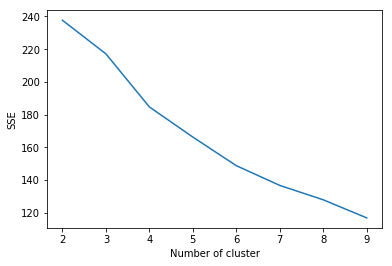

In [50]:
#FIND OUT OPTIMAL NUMBER OF CLUSTERS
#METHOD 1: Elbow curve based on SSE 
sse = {}
slh={}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_ 
#    this is to find silhouette score
    label = kmeans.labels_
    slh[k] = silhouette_score(X, label, metric='euclidean')
#PLOT THE GRAPHS
import matplotlib.pyplot as plt
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
# plt.show()

Text(0,0.5,'Silhouette Score')

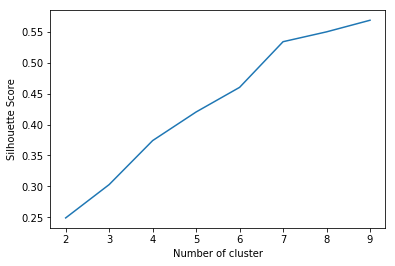

In [51]:
#METHOD 2: Using  silhouette score: higher the better
plt.figure()
plt.plot(list(slh.keys()), list(slh.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
# plt.show()

In [52]:
#####################################################
#GET num_clus FROM ABOVE 2 METHODS AND FIT THE FINAL CLSUTER
num_clus = 4
model = KMeans(n_clusters=num_clus, init='k-means++', max_iter=100, n_init=2)
model.fit(X)

print("Top terms per cluster:")
clus_cent = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clus):
    print("Cluster %d:" % i),
    for ind in clus_cent[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 ck
 online
 transfer
 banking
 xxxxxx1696
 deposit
 xxxxxx6643
 xxxxxx7330
 xxxxxx4335
 xxxxxx1584
Cluster 1:
 dividend
 zz
 69
 amp
 amazon
 alderwood
 aker
 airbnb
 ahlo
 advocare
Cluster 2:
 mobile
 banking
 deposit
 card
 ending
 pos
 waus
 sq
 bothell
 becu
Cluster 3:
 external
 square
 deposit
 payments
 advocare
 stripe
 transfer
 stylehaul
 zz
 edi


In [53]:
# The model can be used to predict the cluster of new transaction
Y = vectorizer.transform(['ATM Deposit - BECU 317 NW GILMAN BLVD ISSAQUAH WAUS - Card Ending In 8648'])
prediction = model.predict(Y)
print(prediction)

[2]


The above transaction belongs to Cluster 2